<a href="https://colab.research.google.com/github/kunjkinger/tensor_flow/blob/main/Manual_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
class simple():

  def __init__(self,name):
    print('hello ' + name)
  
  def yell(self):
    print('yelling!')

In [ ]:
x = simple('kunj')

hello kunj


In [ ]:
x.yell()

yelling!


In [ ]:
class extended(simple):

  def __init__(self):
    print('extended')

In [ ]:
y = extended()

extended


In [ ]:
y.yell() # but still hello is not printing uf we want to call every functions from that class we need to call super 

yelling!


In [ ]:
class superextended(simple):

  def __init__(self):

    super().__init__('kunj')
    print('Super Extended!')

In [ ]:
z = superextended()

hello kunj
Super Extended!


In [ ]:
z.yell()

yelling!


##operation

In [ ]:
class operation():

  def __init__(self,input_nodes=[]):
    self.input_nodes = input_nodes
    self.output_nodes = []

    for node in input_nodes:
      node.output_nodes.append(self)

    _default_graph.operations.append(self)

  def compute(self):
    pass


In [ ]:
class add(operation):
  
  def __init__(self,x,y):
    super().__init__([x,y])
  
  def compute(self,x_var,y_var):
    self.inputs = [x_var,y_var]
    return x_var + y_var

In [ ]:
class multiply(operation):
  
  def __init__(self,x,y):
    super().__init__([x,y])
  
  def compute(self,x_var,y_var):
    self.inputs = [x_var,y_var]
    return x_var * y_var

In [ ]:
class matmul(operation):
  
  def __init__(self,x,y):
    super().__init__([x,y])
  
  def compute(self,x_var,y_var):
    self.inputs = [x_var,y_var]
    return x_var.dot(y_var)

In [ ]:
class Placeholder():

  def __init__(self):
    self.output_nodes = []

    _default_graph.placeholders.append(self)

In [ ]:
class Variable():

  def __init__(self,initial_value=None):

    self.value = initial_value
    self.output_nodes = []

    _default_graph.variables.append(self)


In [ ]:
class Graph():
  
  def __init__(self):
    self.operations = []
    self.placeholders = []
    self.variables = []

  def set_as_default(self):

    global _default_graph
    _default_graph = self

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [ ]:
g = Graph()

In [ ]:
g.set_as_default()

In [ ]:
A = Variable(10)

In [ ]:
b = Variable(1)

In [ ]:
x = Placeholder()

In [ ]:
y = multiply(A,x)

In [ ]:
z = add(y,b)

In [ ]:
import numpy as np
 
def traverse_postorder(Operation):
    nodes_postorder = []
    
    def recurse(node):
        if isinstance(node,operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)
        
    recurse(Operation)
    return nodes_postorder   

In [ ]:
class Session():

  def run(self,Operation,feed_dict={}):

    nodes_postorder = traverse_postorder(Operation)

    for node in nodes_postorder:

      if type(node) == Placeholder:
        node.output = feed_dict[node]

      elif type(node) == Variable:
        node.output = node.value
      
      else:
        #operation
        node.inputs = [input_node.output for input_node in node.input_nodes]

        node.output = node.compute(*node.inputs)

      if type(node.output) == list:
        node.output = np.array(node.output)
    
    return Operation.output

In [ ]:
sess = Session()

In [ ]:
result = sess.run(Operation=z,feed_dict={x:10})

In [ ]:
result  

101

In [ ]:
g = Graph()
g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2,])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

In [ ]:
sess = Session()

In [ ]:
sess.run(Operation=z,feed_dict={x:10})

array([[101, 202],
       [301, 402]])

##calssfication

##Activation function

In [109]:
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [112]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

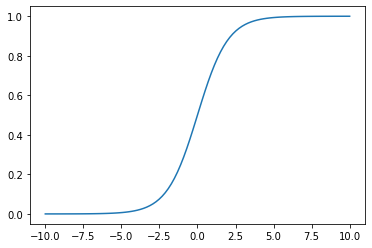

In [113]:
plt.plot(sample_z,sample_a)

In [128]:
class Sigmoid(operation):

  def __init__(self,z):

    super().__init__([z])

  def compute(self,z_val):
    return 1 / (1 + np.exp(-z_val))

In [115]:
from sklearn.datasets import make_blobs

In [116]:
data = make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [117]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [118]:
type(data)

tuple

In [119]:
features = data[0]
labels = data[1]

In [121]:
labels

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

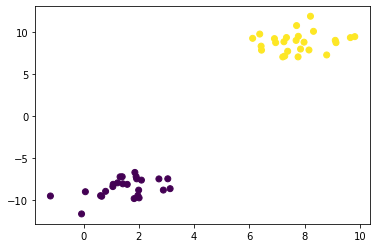

In [124]:
plt.scatter(features[:,0],features[:,1],c=labels)

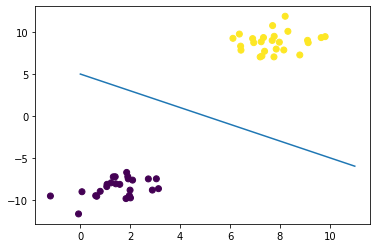

In [127]:
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0],features[:,1],c=labels)
plt.plot(x,y)